# Лабораторная работа №6

Черновик лабораторной. Ниже скриншоты экрана конечного приложения и код модели. Использовался Streamlit.

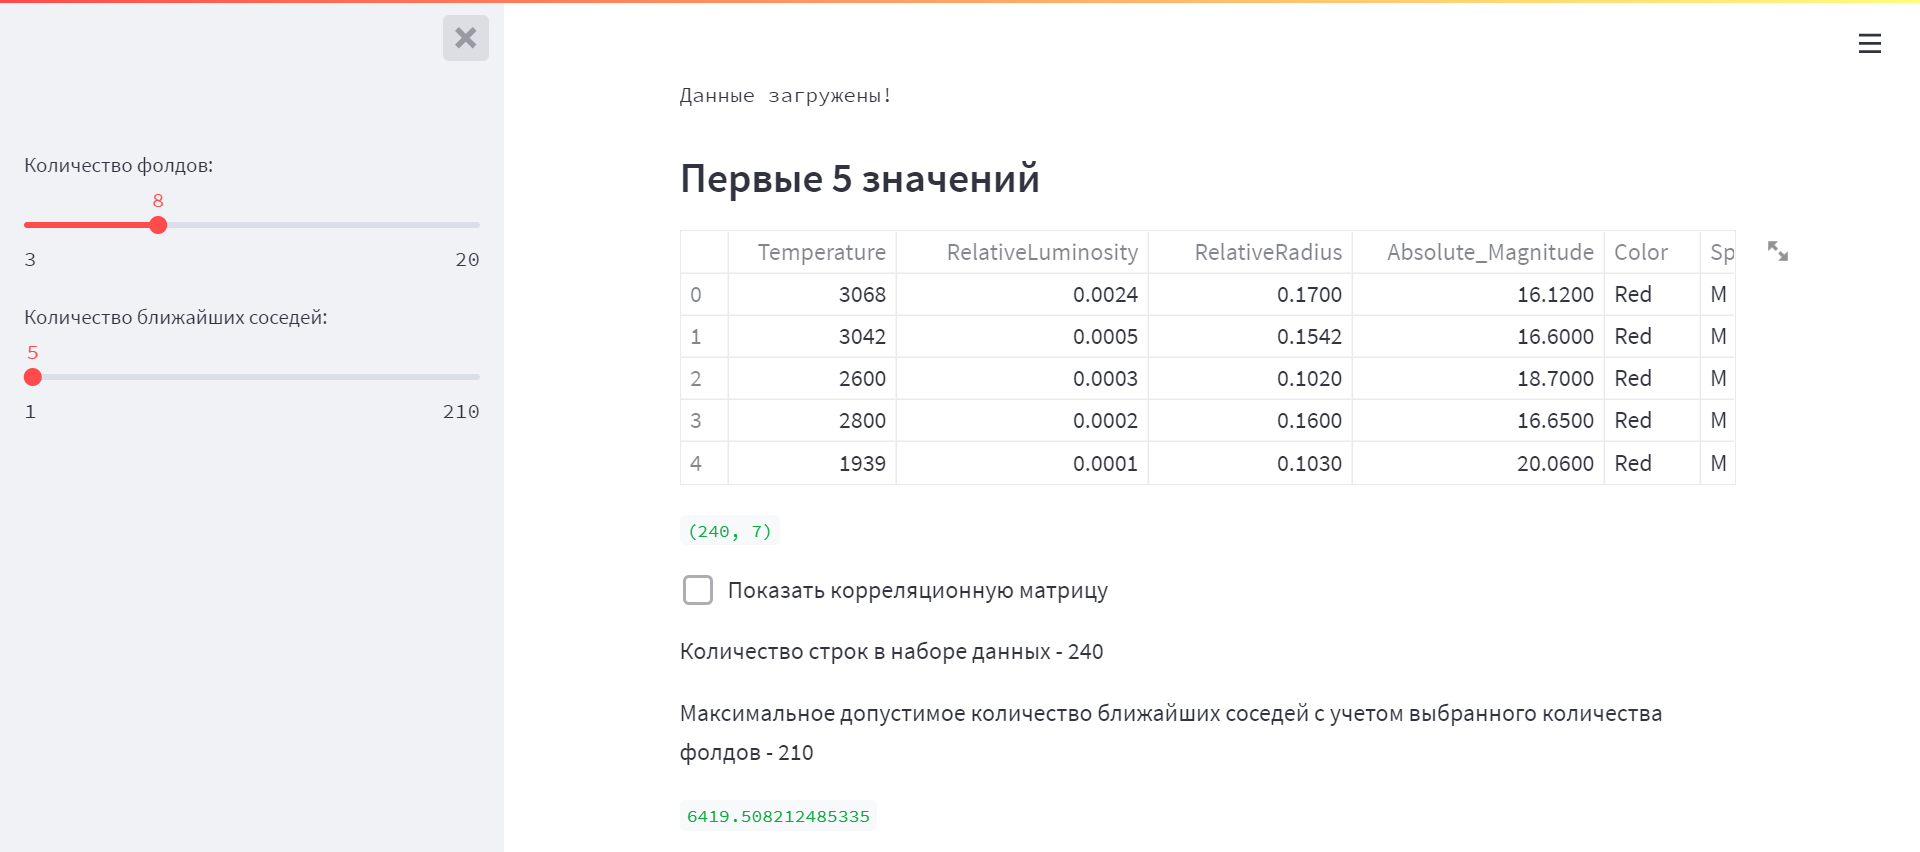

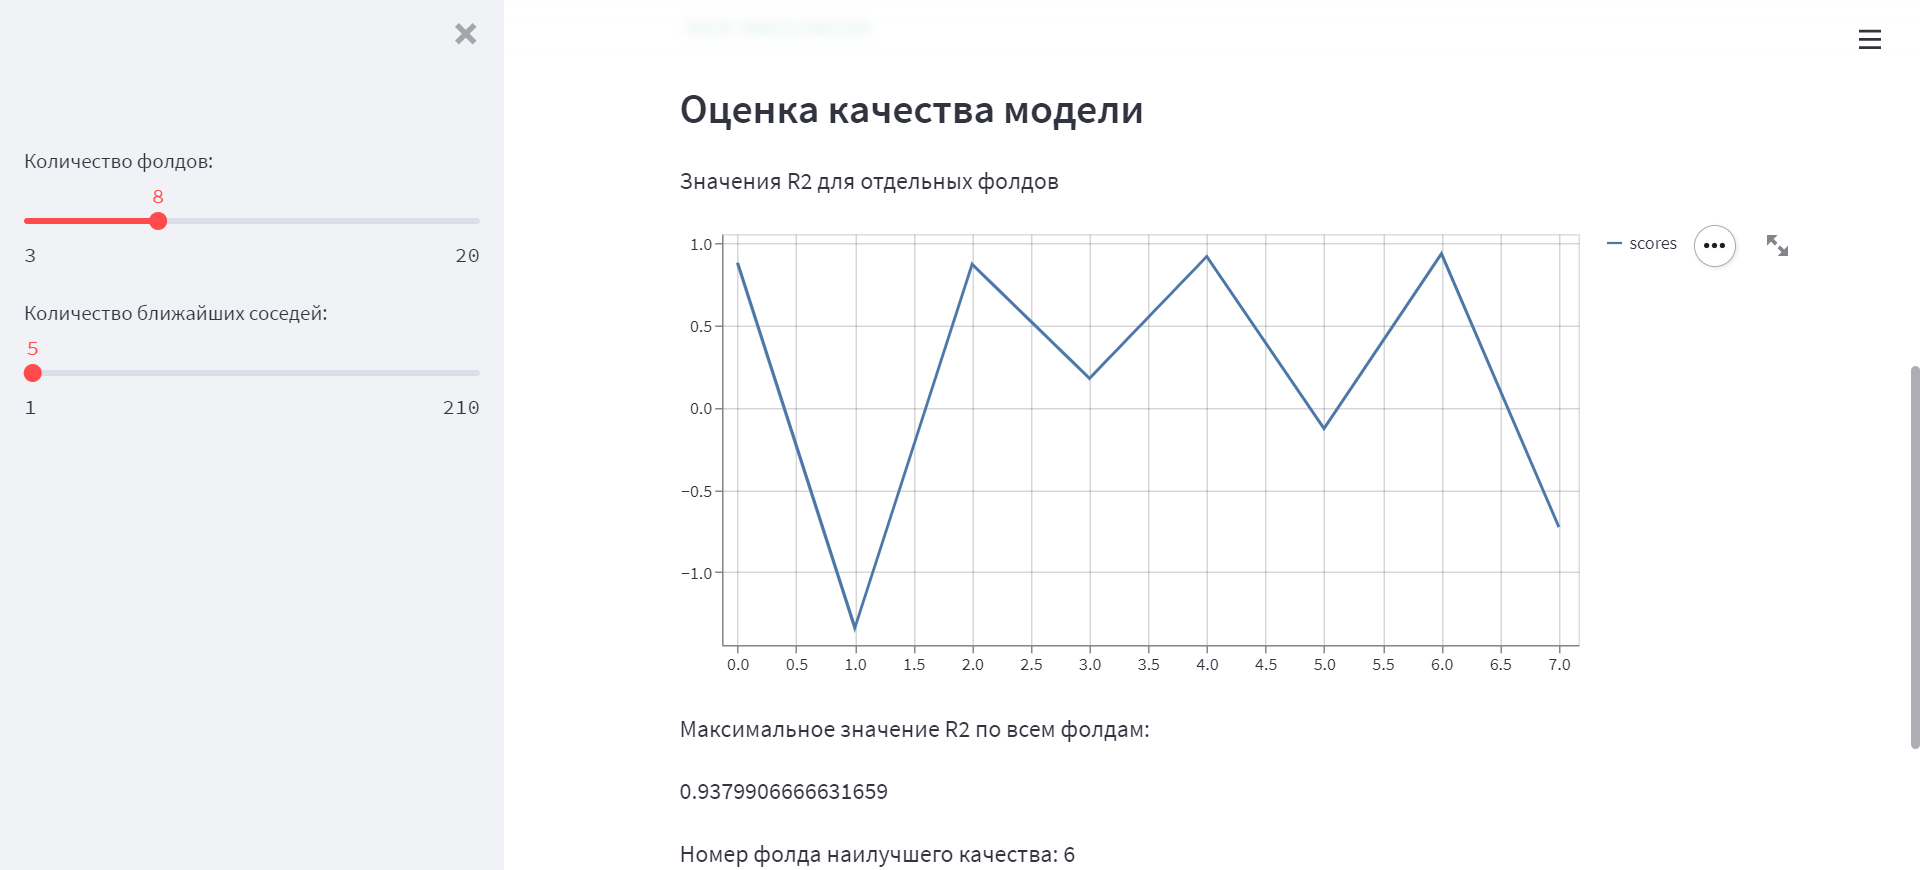

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error

In [94]:
data = pd.read_csv("Stars.csv")

In [95]:
data.head()

,Temperature,RelativeLuminosity,RelativeRadius,Absolute_Magnitude,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [96]:
data.shape

(240, 7)

In [97]:
data.dtypes

Temperature             int64
RelativeLuminosity    float64
RelativeRadius        float64
Absolute_Magnitude    float64
Color                  object
Spectral_Class         object
Type                    int64
dtype: object

In [98]:
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [99]:
data.dtypes

Temperature             int64
RelativeLuminosity    float64
RelativeRadius        float64
Absolute_Magnitude    float64
Color                   int32
Spectral_Class          int32
Type                    int64
dtype: object

<AxesSubplot:>

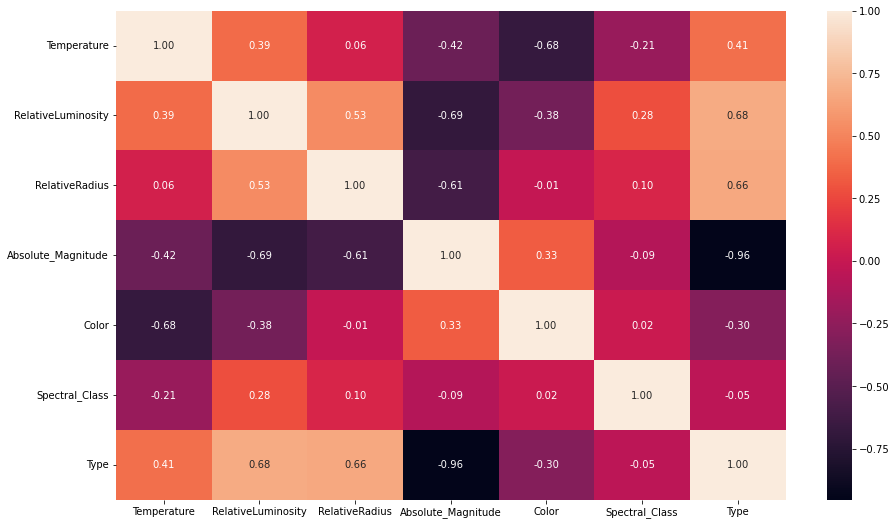

In [100]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f")

In [101]:
target = "Temperature"

In [102]:
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

In [103]:
trainX.shape, trainY.shape

((192, 6), (192,))

In [104]:
KNN = KNeighborsRegressor(n_neighbors=10)

In [105]:
KNN.fit(trainX, trainY)

KNeighborsRegressor(n_neighbors=10)

In [106]:
testX.shape, testY.shape

((48, 6), (48,))

In [107]:
mean_squared_error(testY, KNN.predict(testX), squared = False)

8644.028086379925

In [108]:
kf = KFold(n_splits=10)
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), xArray, yArray, scoring='r2', cv=6)

In [109]:
scores

array([ 0.67619307, -5.17666915,  0.18475444,  0.66513752,  0.20513696,
       -0.66793887])

Text(0.5, 1.0, 'Гиперпараметр при KFold()')

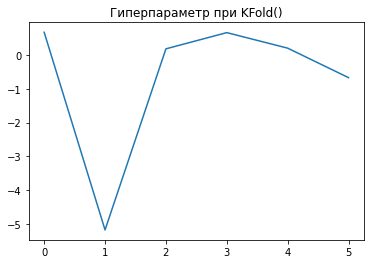

In [110]:
plt.plot(range(len(scores)), scores)
plt.title("Гиперпараметр при KFold()")